# **House price prediction**

import libraries

In [12]:
import numpy as np
import math
import matplotlib.pyplot as plt

# **Load the Data**

**Function load_house_data to convert the text to float and split the data**

In [13]:
def load_house_data():
    data = np.loadtxt("houses.txt", delimiter=',', skiprows=1)
    X = data[:,:4]
    y = data[:,4]
    return X, y

In [14]:
X_train,y_train = load_house_data()

In [15]:
X_train

array([[1.244e+03, 3.000e+00, 1.000e+00, 6.400e+01],
       [1.947e+03, 3.000e+00, 2.000e+00, 1.700e+01],
       [1.725e+03, 3.000e+00, 2.000e+00, 4.200e+01],
       [1.959e+03, 3.000e+00, 2.000e+00, 1.500e+01],
       [1.314e+03, 2.000e+00, 1.000e+00, 1.400e+01],
       [8.640e+02, 2.000e+00, 1.000e+00, 6.600e+01],
       [1.836e+03, 3.000e+00, 1.000e+00, 1.700e+01],
       [1.026e+03, 3.000e+00, 1.000e+00, 4.300e+01],
       [3.194e+03, 4.000e+00, 2.000e+00, 8.700e+01],
       [7.880e+02, 2.000e+00, 1.000e+00, 8.000e+01],
       [1.200e+03, 2.000e+00, 2.000e+00, 1.700e+01],
       [1.557e+03, 2.000e+00, 1.000e+00, 1.800e+01],
       [1.430e+03, 3.000e+00, 1.000e+00, 2.000e+01],
       [1.220e+03, 2.000e+00, 1.000e+00, 1.500e+01],
       [1.092e+03, 2.000e+00, 1.000e+00, 6.400e+01],
       [8.480e+02, 1.000e+00, 1.000e+00, 1.700e+01],
       [1.682e+03, 3.000e+00, 2.000e+00, 2.300e+01],
       [1.768e+03, 3.000e+00, 2.000e+00, 1.800e+01],
       [1.040e+03, 3.000e+00, 1.000e+00, 4.400

In [16]:
y_train

array([300.   , 509.8  , 394.   , 540.   , 415.   , 230.   , 560.   ,
       294.   , 718.2  , 200.   , 302.   , 468.   , 374.2  , 388.   ,
       282.   , 311.8  , 401.   , 449.8  , 301.   , 502.   , 340.   ,
       400.282, 572.   , 264.   , 304.   , 298.   , 219.8  , 490.7  ,
       216.96 , 368.2  , 280.   , 526.87 , 237.   , 562.426, 369.8  ,
       460.   , 374.   , 390.   , 158.   , 426.   , 390.   , 277.774,
       216.96 , 425.8  , 504.   , 329.   , 464.   , 220.   , 358.   ,
       478.   , 334.   , 426.98 , 290.   , 463.   , 390.8  , 354.   ,
       350.   , 460.   , 237.   , 288.304, 282.   , 249.   , 304.   ,
       332.   , 351.8  , 310.   , 216.96 , 666.336, 330.   , 480.   ,
       330.3  , 348.   , 304.   , 384.   , 316.   , 430.4  , 450.   ,
       284.   , 275.   , 414.   , 258.   , 378.   , 350.   , 412.   ,
       373.   , 225.   , 390.   , 267.4  , 464.   , 174.   , 340.   ,
       430.   , 440.   , 216.   , 329.   , 388.   , 390.   , 356.   ,
       257.8  ])

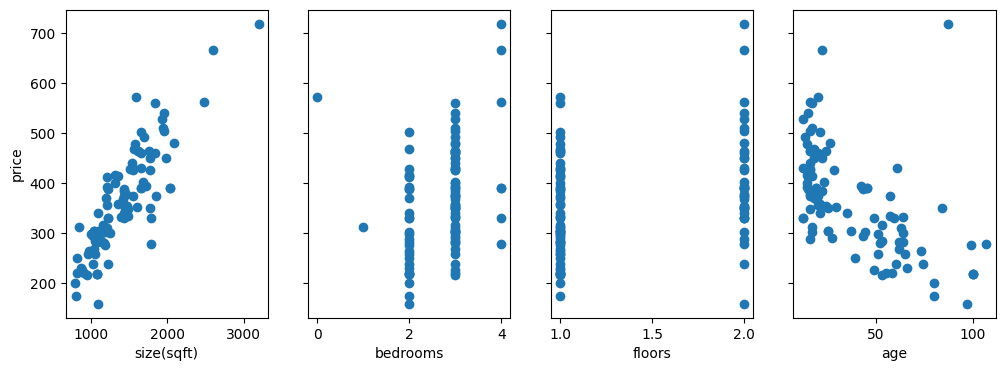

In [17]:
X_features = ['size(sqft)','bedrooms','floors','age']
fig,ax = plt.subplots(1,4, figsize=(12,4), sharey=True)
for i in range(len(ax)):
  ax[i].scatter(X_train[:,i],y_train)
  ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("price")
plt.show()

# **Compute the cost Function**

In [18]:
def compute_cost(X,y,w,b):
  m = X.shape[0]
  cost = 0
  for i in range(m):
    f_wb = np.dot(w,X[i]) + b
    cost += (f_wb - y[i])**2
  cost = cost/(2*m)
  return cost

# **Compute Gradient Descent**

In [19]:
def compute_gradient(X,y,w,b):
  m,n = X.shape
  d_w = np.zeros((n,))
  d_b = 0
  for i in range(m):
    f_wb = (np.dot(w,X[i]) + b) - y[i]
    for j in range(n):
      d_w[j] += f_wb*X[i,j]
    d_b = d_b + f_wb
  d_w = d_w/m
  d_b = d_b/m
  return d_w,d_b

In [20]:
def gradient_descent(X,y,w_in,b_in,cost_function,gradient_function,alpha,num_iters):
  J_his = []
  w = w_in
  b = b_in
  for i in range(num_iters):
    d_w,d_b = gradient_function(X,y,w,b)
    w = w - alpha*d_w
    b = b - alpha*d_b
    if i<100000:
      J_his.append(cost_function(X,y,w,b))
    if i%math.ceil(num_iters/10) == 0:
      print(f"Iteration {i:4}: Cost {J_his[-1]:.2f} , w = {w}, b = {b}")
  return w,b,J_his

# **Scale The Features**

Using Zero_score_normalization

In [21]:
# def z_score_normalization(X):
#   m,n = X.shape
#   u = np.zeros((n,))
#   s = np.zeros((n,))
#   X_scaled = np.zeros((m,n))
#   for j in range(n):
#     for i in range(m):
#       u[j] += X[i,j]
#     u[j] = u[j]/m
#   for j in range(n):
#     for i in range(m):
#       s[j] += (X[i,j]-u[j])**2
#     s[j] = s[j]/m
#   s = np.sqrt(s)
#   for j in range(n):
#     for i in range(m):
#       X_scaled[i,j] = (X[i,j]-u[j])/s[j]
#   return X_scaled, u, s

In [39]:
def zscore_normalize_features(X):
    mu     = np.mean(X, axis=0)
    sigma  = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return (X_norm, mu, sigma)

In [50]:
X_scaled, u, s = zscore_normalize_features(X_train)
Y_scaled , u_y, s_y = zscore_normalize_features(y_train)

Before Scale

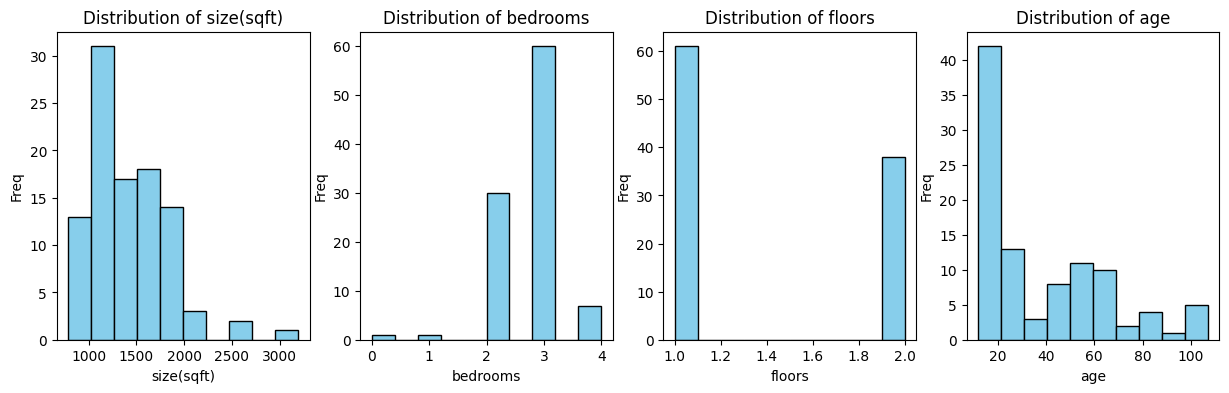

In [90]:
fig, axes = plt.subplots(1 ,4, figsize=(15,4))

for i in range(len(X_features)):
    axes[i].hist(X_train[:, i], color='skyblue', edgecolor='black')
    axes[i].set_xlabel(X_features[i])
    axes[i].set_ylabel('Freq')
    axes[i].set_title(f'Distribution of {X_features[i]}')
plt.show()

After Scale

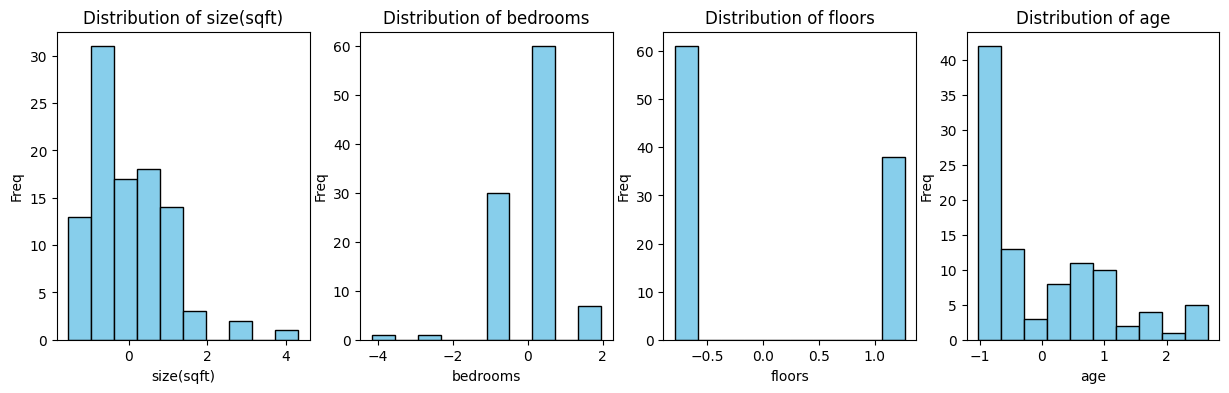

In [91]:
fig, axes = plt.subplots(1 ,4, figsize=(15,4))

for i in range(len(X_features)):
    axes[i].hist(X_scaled[:, i], color='skyblue', edgecolor='black')
    axes[i].set_xlabel(X_features[i])
    axes[i].set_ylabel('Freq')
    axes[i].set_title(f'Distribution of {X_features[i]}')
plt.show()

Histogram shows the data before scaling, where there is a large range of values across the features. After scaling, the values of all the features are centered around zero.

# **Train the model**

In [62]:
w_init = np.array([5.5e-01,1.0e-03,5.1e-04,1.2e-02])
b_init = 3.6e-04
iterations = 200
# alpha = 5.9e-7
alpha = 1.0e-1
# alpha = 9e-7
# alpha = 1e-7
w_final,b_final,J_hist = gradient_descent(X_scaled,y_train,w_init,b_init,compute_cost,compute_gradient,alpha,iterations)
print(f"w_final = {w_final}, b_final = {b_final}" )

Iteration    0: Cost 57582.43 , w = [ 9.40950981  2.92228511  3.25003182 -5.93563313], b = 36.315932080808096
Iteration   20: Cost 1458.98 , w = [ 70.50746035  -2.49990679  -6.86213773 -40.05824556], b = 323.41994893993495
Iteration   40: Cost 342.39 , w = [ 90.30538622 -11.71055234 -20.32402415 -40.98163851], b = 358.3250948291819
Iteration   60: Cost 247.80 , w = [100.29418181 -16.32095857 -26.66425871 -39.79362652], b = 362.5687456943923
Iteration   80: Cost 226.48 , w = [105.36084875 -18.71651122 -29.71361643 -38.94635941], b = 363.084674569835
Iteration  100: Cost 221.07 , w = [107.92770112 -19.96028154 -31.21082192 -38.4753654 ], b = 363.147399476518
Iteration  120: Cost 219.68 , w = [109.22752418 -20.60073698 -31.95524503 -38.22853927], b = 363.155025360832
Iteration  140: Cost 219.33 , w = [109.88562759 -20.92834539 -32.32815549 -38.10164898], b = 363.15595249033527
Iteration  160: Cost 219.24 , w = [110.21880228 -21.09521088 -32.5157833  -38.03691433], b = 363.15606520763856
I

Text(0, 0.5, 'Cost')

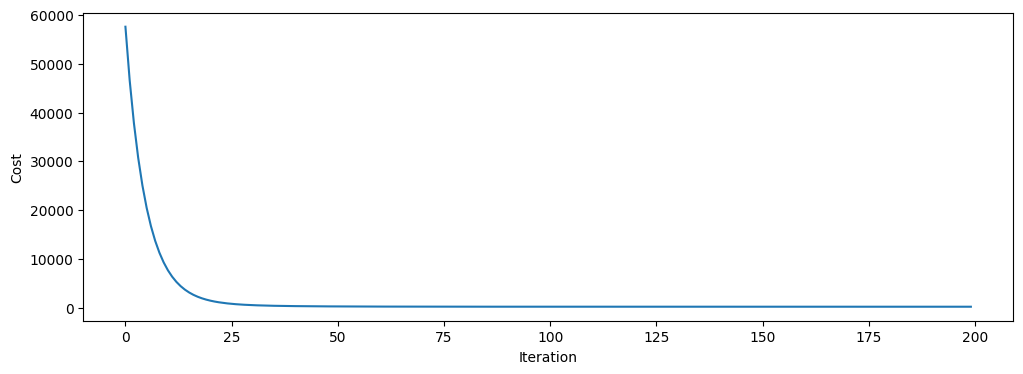

In [63]:
fig,ax = plt.subplots(1,1, figsize=(12,4), sharey=True)
ax.plot(J_hist)
ax.set_xlabel("Iteration")
ax.set_ylabel("Cost")

In [64]:
def predict(x,w,b):
  p = np.dot(x,w) + b
  return p

In [65]:
y_pred = predict(X_scaled,w_final,b_final)
print(y_train)
print(y_pred)

[300.    509.8   394.    540.    415.    230.    560.    294.    718.2
 200.    302.    468.    374.2   388.    282.    311.8   401.    449.8
 301.    502.    340.    400.282 572.    264.    304.    298.    219.8
 490.7   216.96  368.2   280.    526.87  237.    562.426 369.8   460.
 374.    390.    158.    426.    390.    277.774 216.96  425.8   504.
 329.    464.    220.    358.    478.    334.    426.98  290.    463.
 390.8   354.    350.    460.    237.    288.304 282.    249.    304.
 332.    351.8   310.    216.96  666.336 330.    480.    330.3   348.
 304.    384.    316.    430.4   450.    284.    275.    414.    258.
 378.    350.    412.    373.    225.    390.    267.4   464.    174.
 340.    430.    440.    216.    329.    388.    390.    356.    257.8  ]
[295.1767465  485.96033674 389.53817943 492.1282346  420.19654484
 222.79461853 523.32046513 267.6166001  684.92509826 181.76638175
 318.02969669 479.51848382 409.93677915 393.49506537 286.93281862
 323.25998563 405.9973875

Text(0, 0.5, 'Price (1000s of dollars)')

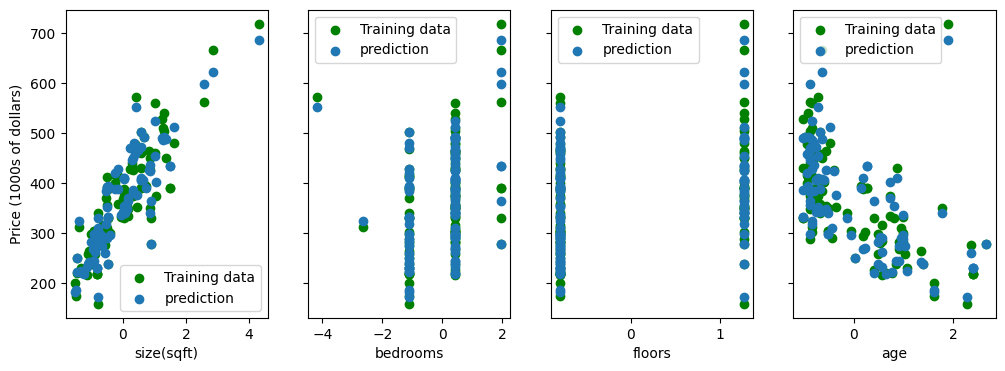

In [92]:
fig,ax = plt.subplots(1,4, figsize=(12,4), sharey=True)
for i in range(len(ax)):
  ax[i].scatter(X_scaled[:,i], y_train,color='g')
  ax[i].scatter(X_scaled[:,i], y_pred)
  ax[i].set_xlabel(X_features[i])
  ax[i].legend(['Training data', 'prediction'])
ax[0].set_ylabel('Price (1000s of dollars)')